In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
#working directory
os.chdir("C:\\Users\\shive\\Desktop\\MS-BAIM\\Courses\\online courses\\A-Z Deep Learning\\Deep_Learning_A_Z\\Volume 1 - Supervised Deep Learning\\Part 1 - Artificial Neural Networks (ANN)\\Section 4 - Building an ANN\\Artificial_Neural_Networks")

# Data Preprocessing

In [3]:
dataset= pd.read_csv("Churn_Modelling.csv")
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [6]:
#creating dummy variables
geography= pd.get_dummies(dataset["Geography"], drop_first= True)
#geography.head(5)
gender= pd.get_dummies(dataset["Gender"], drop_first= True)

In [7]:
#dropping irrelevant columns and concatinating created dummy variables
dataset= dataset.drop(["Geography", "Gender", "RowNumber", "CustomerId", "Surname"], axis=1)
dataset= pd.concat([geography, dataset], axis=1)
dataset= pd.concat([gender, dataset], axis=1)
dataset.head(5)

,Male,Germany,Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,850,43,2,125510.82,1,1,1,79084.10,0


In [8]:
len(dataset.columns)

12

In [9]:
#filtering parameters which might affect churn rate based on business intuition
x= dataset.iloc[:, :11].values
y= dataset.iloc[:, 11].values

In [10]:
x[:5]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.1900000e+02,
        4.2000000e+01, 2.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 6.0800000e+02,
        4.1000000e+01, 1.0000000e+00, 8.3807860e+04, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.0200000e+02,
        4.2000000e+01, 8.0000000e+00, 1.5966080e+05, 3.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.1393157e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 6.9900000e+02,
        3.9000000e+01, 1.0000000e+00, 0.0000000e+00, 2.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 9.3826630e+04],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 8.5000000e+02,
        4.3000000e+01, 2.0000000e+00, 1.2551082e+05, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 7.9084100e+04]])

In [11]:
y[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [12]:
#Splitting the dataset into training ans test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=0.2, random_state= 0)

In [13]:
x_train[:5]

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 6.6700000e+02,
        3.4000000e+01, 5.0000000e+00, 0.0000000e+00, 2.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.6383064e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 4.2700000e+02,
        4.2000000e+01, 1.0000000e+00, 7.5681520e+04, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 5.7098000e+04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.3500000e+02,
        2.9000000e+01, 2.0000000e+00, 1.1236734e+05, 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.8563076e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 6.5400000e+02,
        4.0000000e+01, 5.0000000e+00, 1.0568363e+05, 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 1.7361709e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 8.5000000e+02,
        5.7000000e+01, 8.0000000e+00, 1.2677630e+05, 2.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.3229849e+05]])

In [14]:
y_train[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [15]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [16]:
x_train[:5], x_test[:5]

(array([[-1.09168714, -0.5698444 ,  1.74309049,  0.16958176, -0.46460796,
          0.00666099, -1.21571749,  0.8095029 ,  0.64259497, -1.03227043,
          1.10643166],
        [ 0.91601335,  1.75486502, -0.57369368, -2.30455945,  0.30102557,
         -1.37744033, -0.00631193, -0.92159124,  0.64259497,  0.9687384 ,
         -0.74866447],
        [-1.09168714, -0.5698444 , -0.57369368, -1.19119591, -0.94312892,
         -1.031415  ,  0.57993469, -0.92159124,  0.64259497, -1.03227043,
          1.48533467],
        [ 0.91601335, -0.5698444 ,  1.74309049,  0.03556578,  0.10961719,
          0.00666099,  0.47312769, -0.92159124,  0.64259497, -1.03227043,
          1.27652776],
        [-1.09168714, -0.5698444 ,  1.74309049,  2.05611444,  1.73658844,
          1.04473698,  0.8101927 ,  0.8095029 ,  0.64259497,  0.9687384 ,
          0.55837842]]),
 array([[-1.09168714,  1.75486502, -0.57369368, -0.55204276, -0.36890377,
          1.04473698,  0.8793029 , -0.92159124,  0.64259497,  0.96873

# Building ANN Model

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [18]:
#initializing the ANN
ann_classifier= Sequential()
#adding input layers and hidden layers
ann_classifier.add(Dense(6, activation= "relu", kernel_initializer= "uniform", input_shape= (11,)))
ann_classifier.add(Dropout(p= 0.1))
#adding second hidden layers
ann_classifier.add(Dense(6, activation= "relu", kernel_initializer= "uniform"))
ann_classifier.add(Dropout(p= 0.1))
#adding the output layer
ann_classifier.add(Dense(1, activation= "sigmoid", kernel_initializer= "uniform"))
#compiling the ANN
ann_classifier.compile(optimizer="adam", loss= "binary_crossentropy", metrics= ["accuracy"])

In [19]:
#fitting the ANN to the training dataset
ann_classifier.fit(x= x_train, y= y_train, batch_size= 10, epochs= 100)

Epoch 1/100
8000/8000 [==============================] - 1s 107us/step - loss: 0.4803 - accuracy: 0.7960
Epoch 2/100
8000/8000 [==============================] - 1s 92us/step - loss: 0.4273 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 97us/step - loss: 0.4220 - accuracy: 0.8006
Epoch 4/100
8000/8000 [==============================] - 1s 98us/step - loss: 0.4182 - accuracy: 0.8244 0s - loss: 0.4187 - accu
Epoch 5/100
8000/8000 [==============================] - 1s 85us/step - loss: 0.4163 - accuracy: 0.8284
Epoch 6/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4141 - accuracy: 0.8316 0s - loss: 0.4134 - accuracy: 0.
Epoch 7/100
8000/8000 [==============================] - 1s 76us/step - loss: 0.4132 - accuracy: 0.8316
Epoch 8/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4117 - accuracy: 0.8350
Epoch 9/100
8000/8000 [==============================] - 1s 78us/step - loss: 0.4105 - accuracy: 0.8346
Epoch

8000/8000 [==============================] - 1s 82us/step - loss: 0.3999 - accuracy: 0.8347 0s - loss: 0.4064 - accu
Epoch 71/100
8000/8000 [==============================] - 1s 76us/step - loss: 0.4007 - accuracy: 0.8347
Epoch 72/100
8000/8000 [==============================] - 1s 85us/step - loss: 0.4001 - accuracy: 0.8363
Epoch 73/100
8000/8000 [==============================] - 1s 86us/step - loss: 0.3999 - accuracy: 0.8340
Epoch 74/100
8000/8000 [==============================] - 1s 82us/step - loss: 0.4006 - accuracy: 0.8350
Epoch 75/100
8000/8000 [==============================] - 1s 73us/step - loss: 0.4000 - accuracy: 0.8345
Epoch 76/100
8000/8000 [==============================] - 1s 74us/step - loss: 0.4003 - accuracy: 0.8341 0s - loss: 0.3914 - accuracy: 0.83 - ETA: 0s - loss: 0.389
Epoch 77/100
8000/8000 [==============================] - 1s 76us/step - loss: 0.4004 - accuracy: 0.8339 0s - loss: 0.394
Epoch 78/100
8000/8000 [==============================] - 1s 74us/step -

In [20]:
#predicting the test set result
y_pred= ann_classifier.predict(x_test)
y_pred[:5]

array([[0.23745051],
       [0.4061626 ],
       [0.20519778],
       [0.07569614],
       [0.20627171]], dtype=float32)

In [21]:
y_pred= (y_pred>0.5)#considering threshold = 0.5
y_pred[:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

In [22]:
#confusion metrix
from sklearn.metrics import confusion_matrix, classification_report
ann_cm= confusion_matrix(y_test, y_pred)
ann_cm

array([[1521,   74],
       [ 239,  166]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1595
           1       0.69      0.41      0.51       405

    accuracy                           0.84      2000
   macro avg       0.78      0.68      0.71      2000
weighted avg       0.83      0.84      0.83      2000



In [24]:
ann_accuracy= sklearn.metrics.accuracy_score(y_test, y_pred).round(3)
print(ann_accuracy)

0.844


In [25]:
#fitting logistic regression
from sklearn.linear_model import LogisticRegression
lr_classifier= LogisticRegression(random_state=0)
lr_classifier.fit(x_train, y_train)

C:\Users\shive\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
#predicting
lr_y_pred= lr_classifier.predict(x_test)
lr_y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [27]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.58      0.24      0.34       405

    accuracy                           0.81      2000
   macro avg       0.71      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000



In [28]:
lr_accuracy= sklearn.metrics.accuracy_score(y_test, lr_y_pred).round(3)
print(lr_accuracy)

0.811


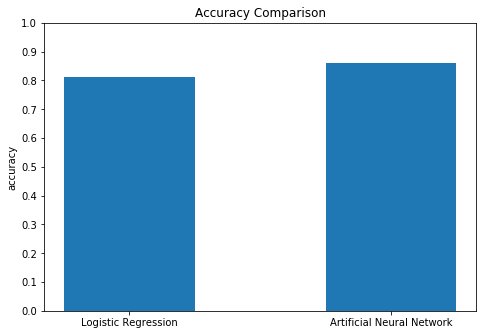

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Logistic Regression', 'Artificial Neural Network']
accuracies = [0.811,0.859]
plt.bar(models, accuracies, width= 0.5)
plt.title("Accuracy Comparison")
plt.ylabel("accuracy")
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

In [31]:
"""Prediction for customer with following attributes
Geography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $60000
Number of Products: 2
Does this customer have a credit card ? Yes
Is this customer an Active Member: Yes
Estimated Salary: $50000"""
new_prediction = ann_classifier.predict(sc.transform(np.array([[0.0, 0, 0, 600, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction= (new_prediction > 0.5)
print(new_prediction)

[[False]]


# Evaluating, Improving and Tuning the ANN

In [45]:
#Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

def build_ann_classifier():
    ann_classifier= Sequential()
    ann_classifier.add(Dense(6, activation= "relu", kernel_initializer= "uniform", input_shape= (11,)))
    ann_classifier.add(Dense(6, activation= "relu", kernel_initializer= "uniform"))
    ann_classifier.add(Dense(1, activation= "sigmoid", kernel_initializer= "uniform"))
    ann_classifier.compile(optimizer="adam", loss= "binary_crossentropy", metrics= ["accuracy"])
    return ann_classifier


In [46]:
ann_classifier= KerasClassifier(build_fn= build_ann_classifier, batch_size= 10, nb_epoch= 100)

In [47]:
accuracies= cross_val_score(estimator= ann_classifier, X= x_train, y= y_train, cv=10, n_jobs= -1)

In [56]:
mean= round(accuracies.mean(),3)
variance= round(accuracies.std(),3)
print("Mean Accuracy:", mean)
print("Variance:", variance)

Mean Accuracy: 0.796
Variance: 0.01


In [65]:
#tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build_ann_classifier(optimizer):
    ann_classifier= Sequential()
    ann_classifier.add(Dense(6, activation= "relu", kernel_initializer= "uniform", input_shape= (11,)))
    ann_classifier.add(Dense(6, activation= "relu", kernel_initializer= "uniform"))
    ann_classifier.add(Dense(1, activation= "sigmoid", kernel_initializer= "uniform"))
    ann_classifier.compile(optimizer=optimizer, loss= "binary_crossentropy", metrics= ["accuracy"])
    return ann_classifier

ann_classifier= KerasClassifier(build_fn= build_ann_classifier)
parameters= {"batch_size": [10, 25, 32],
            "nb_epoch": [50, 100, 500],
            "optimizer": ["adam", "rmsprop"]}
grid_search= GridSearchCV(estimator= ann_classifier, 
                          param_grid= parameters, 
                          cv= 10,  
                          scoring= 'accuracy')
grid_search= grid_search.fit(x_train, y_train)
best_parameter= grid_search.best_params_
best_accuracy= grid_search.best_score_

Epoch 1/1
7200/7200 [==============================] - 2s 230us/step - loss: 0.6190 - accuracy: 0.7965
Epoch 1/1
7200/7200 [==============================] - 2s 233us/step - loss: 0.4888 - accuracy: 0.7968
Epoch 1/1
7200/7200 [==============================] - 2s 232us/step - loss: 0.5001 - accuracy: 0.7950
Epoch 1/1
7200/7200 [==============================] - 2s 262us/step - loss: 0.4813 - accuracy: 0.7968
Epoch 1/1
7200/7200 [==============================] - 2s 247us/step - loss: 0.6199 - accuracy: 0.7932
Epoch 1/1
7200/7200 [==============================] - 2s 252us/step - loss: 0.5016 - accuracy: 0.7933
Epoch 1/1
7200/7200 [==============================] - 2s 240us/step - loss: 0.4927 - accuracy: 0.7961
Epoch 1/1
7200/7200 [==============================] - 2s 224us/step - loss: 0.5153 - accuracy: 0.7989
Epoch 1/1
7200/7200 [==============================] - 2s 235us/step - loss: 0.4894 - accuracy: 0.7958
Epoch 1/1
7200/7200 [==============================] - 2s 249us/step - lo

7200/7200 [==============================] - 1s 90us/step - loss: 0.5728 - accuracy: 0.7953
Epoch 1/1
7200/7200 [==============================] - 1s 120us/step - loss: 0.5479 - accuracy: 0.7971
Epoch 1/1
7200/7200 [==============================] - 1s 109us/step - loss: 0.5653 - accuracy: 0.7960
Epoch 1/1
7200/7200 [==============================] - 1s 109us/step - loss: 0.5549 - accuracy: 0.7949
Epoch 1/1
7200/7200 [==============================] - 1s 107us/step - loss: 0.5526 - accuracy: 0.7972
Epoch 1/1
7200/7200 [==============================] - 1s 105us/step - loss: 0.5818 - accuracy: 0.7926
Epoch 1/1
7200/7200 [==============================] - 1s 101us/step - loss: 0.5485 - accuracy: 0.7943
Epoch 1/1
7200/7200 [==============================] - 1s 107us/step - loss: 0.5603 - accuracy: 0.7969
Epoch 1/1
7200/7200 [==============================] - 1s 155us/step - loss: 0.5654 - accuracy: 0.7950
Epoch 1/1
7200/7200 [==============================] - 1s 134us/step - loss: 0.5556 

7200/7200 [==============================] - 1s 113us/step - loss: 0.6196 - accuracy: 0.7936
Epoch 1/1
7200/7200 [==============================] - 1s 79us/step - loss: 0.5905 - accuracy: 0.7956
Epoch 1/1
7200/7200 [==============================] - 1s 95us/step - loss: 0.6152 - accuracy: 0.7951
Epoch 1/1
7200/7200 [==============================] - 1s 88us/step - loss: 0.5793 - accuracy: 0.7950
Epoch 1/1
7200/7200 [==============================] - 1s 91us/step - loss: 0.6090 - accuracy: 0.7933
Epoch 1/1
7200/7200 [==============================] - 1s 104us/step - loss: 0.5952 - accuracy: 0.7975
Epoch 1/1
7200/7200 [==============================] - 1s 192us/step - loss: 0.5905 - accuracy: 0.7933
Epoch 1/1
7200/7200 [==============================] - 1s 106us/step - loss: 0.5912 - accuracy: 0.7919
Epoch 1/1
7200/7200 [==============================] - 1s 170us/step - loss: 0.5971 - accuracy: 0.7957
Epoch 1/1
7200/7200 [==============================] - 1s 189us/step - loss: 0.5710 - a

In [66]:
best_accuracy

0.797875

In [67]:
best_parameter

{'batch_size': 10, 'nb_epoch': 100, 'optimizer': 'adam'}